<a href="https://colab.research.google.com/github/ChityalaRahul/23CSBTB39-40/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part-1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the US Housing data into a dataframe using pandas
df = pd.read_csv('USA_Housing.csv')

# Check the data types of each feature(column) in the dataset.
print(df.dtypes)

# Generate a summary of the dataset
print(df.describe(percentiles=[.25, .5, .75, .9]))

# List the names of columns/features in the dataset
print(df.columns)

# Generate a pairplot of the features of the dataset.
sns.pairplot(df)
plt.show()

# Generate a correlation matrix and heatmap for the features
# Convert non-numeric columns to numeric if needed
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            print(f"Could not convert column {col} to numeric")

Part-2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('USA_Housing.csv')

# Display the first few rows and data types
print(df.head())
print(df.dtypes)

# Assume 'price' is the target variable and all other columns are features
X = df.drop(columns='price')  # Features
Y = df['price']               # Target variable

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline that includes preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit the model
pipeline.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = pipeline.predict(X_test)
residuals = Y_test - Y_pred

# Compute CDF
sorted_residuals = np.sort(residuals)
cdf = np.arange(1, len(sorted_residuals) + 1) / len(sorted_residuals)

# Plot CDF
plt.figure()
plt.plot(sorted_residuals, cdf, marker='.', linestyle='none')
plt.xlabel('Residuals')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Residuals')
plt.grid(True)
plt.show()

# Optional: Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

# Get model parameters
model = pipeline.named_steps['model']
intercept = model.intercept_
slope = model.coef_
print(f'Intercept: {intercept}')
print(f'Slope: {slope}')


Part-3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

# Load the data
df = pd.read_csv('USA_Housing.csv')

# Display the first few rows and data types
print(df.head())
print(df.dtypes)

# Prepare the data
X = df.drop(columns='price')  # Features
Y = df['price']               # Target variable

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline that includes preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit the model
pipeline.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = pipeline.predict(X_test)

# Calculate residuals
residuals = Y_test - Y_pred

# Get the coefficients for the model
model = pipeline.named_steps['model']
coefficients = model.coef_

# Adding intercept to feature matrix for statsmodels
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
X_train_const = sm.add_constant(X_train_transformed)

# Fit statsmodels OLS model
ols_model = sm.OLS(Y_train, X_train_const).fit()

print("\nStandard Error of Coefficients:")
print(ols_model.bse)  # Standard error of the coefficients

print("\nT-statistic of Coefficients:")
print(ols_model.tvalues)  # T-statistic of the coefficients

# Compute CDF of coefficients
sorted_coefficients = np.sort(coefficients)
cdf = np.arange(1, len(sorted_coefficients) + 1) / len(sorted_coefficients)

# Plot CDF of coefficients
plt.figure()
plt.plot(sorted_coefficients, cdf, marker='.', linestyle='none')
plt.xlabel('Coefficients')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Coefficients')
plt.grid(True)
plt.show()

# Scatter plots for features vs. Price
for feature in X.columns:
    plt.figure()
    plt.scatter(X_test[feature], Y_test, label='True Values', alpha=0.5)
    plt.scatter(X_test[feature], Y_pred, label='Predicted Values', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot of {feature} vs Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Compute R²
r2 = r2_score(Y_test, Y_pred)
print(f'R² Score: {r2}')

# Plot predictions - histogram and scatter plot
plt.figure()
plt.hist(Y_pred, bins=30, alpha=0.7, label='Predicted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Prices')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Scatter Plot of True vs Predicted Prices')
plt.grid(True)
plt.show()

# Evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
sse = np.sum((Y_test - Y_pred) ** 2)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Sum of Squared Errors (SSE): {sse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Min-Max Normalized values for feature 'price':
0    1.000000
1    0.909091
2    0.909091
3    0.906

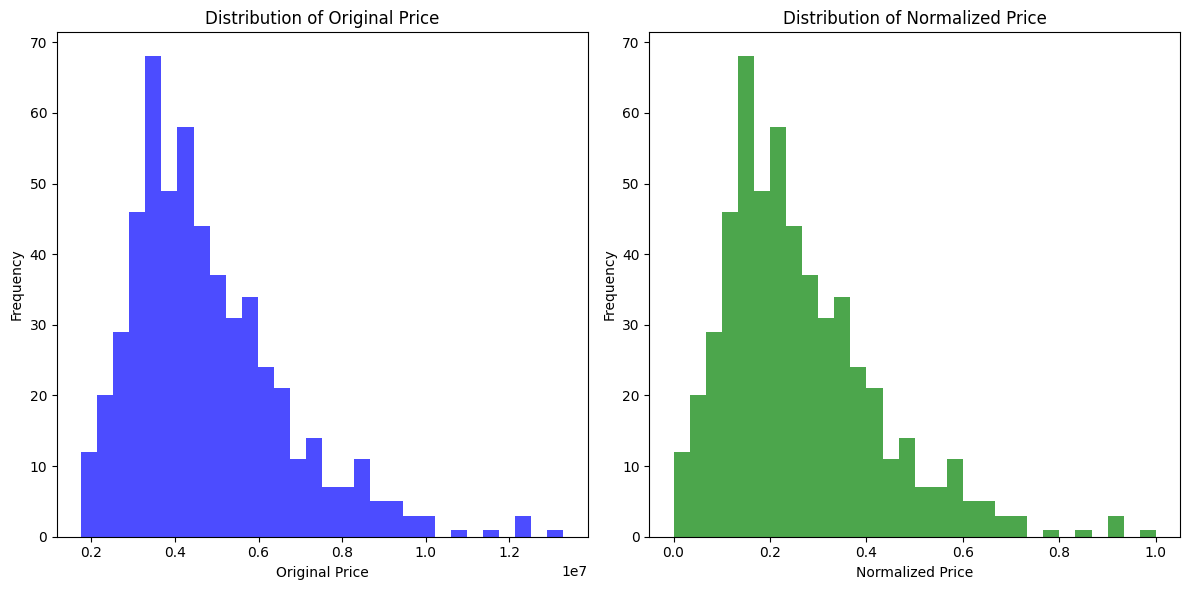

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('USA_Housing.csv')

# Display the first few rows to understand the structure
print(df.head())

# Select the feature to normalize, for example 'Price'
feature = 'price'
data = df[feature]

# Compute Min-Max normalization
min_value = data.min()
max_value = data.max()
data_minmax = (data - min_value) / (max_value - min_value)

# Print the Min-Max normalized values
print(f"Min-Max Normalized values for feature '{feature}':")
print(data_minmax.head())

# Plot the distribution of the original feature
plt.figure(figsize=(12, 6))

# Original feature distribution
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, alpha=0.7, color='blue')
plt.xlabel('Original Price')
plt.ylabel('Frequency')
plt.title('Distribution of Original Price')

# Normalized feature distribution
plt.subplot(1, 2, 2)
plt.hist(data_minmax, bins=30, alpha=0.7, color='green')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Price')

plt.tight_layout()
plt.show()
